In [95]:
# %load dft.py
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as sp

## Downsampling

In [96]:
f0=5000.
fs=22500.
ns=30.
n=np.linspace(0,ns-1,ns)
x=(np.cos(2*np.pi*f0/fs*n)+np.cos(2*np.pi*0.5*f0/fs*n))
#x=np.random.randn(ns)
#x=np.arange(1,7)
x

array([ 2.        ,  0.93969262, -0.76604444, -1.        , -0.17364818,
       -0.17364818, -1.        , -0.76604444,  0.93969262,  2.        ,
        0.93969262, -0.76604444, -1.        , -0.17364818, -0.17364818,
       -1.        , -0.76604444,  0.93969262,  2.        ,  0.93969262,
       -0.76604444, -1.        , -0.17364818, -0.17364818, -1.        ,
       -0.76604444,  0.93969262,  2.        ,  0.93969262, -0.76604444])

In [97]:
# FIR low pass 
M=3
N=4
fpass=2000
fstop=3000
h=sp.remez(N,np.array([0, fpass, fstop, fs/(2*M)]), [1,0], Hz = fs)  

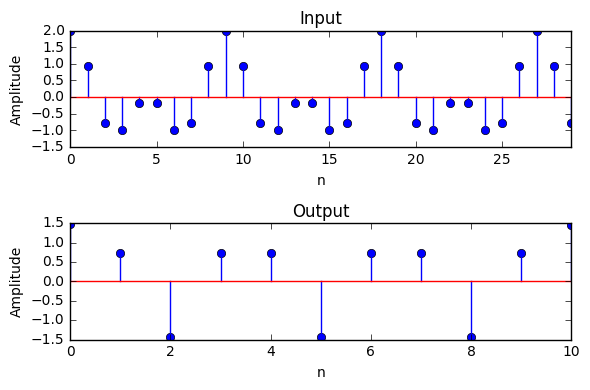

In [98]:
### Downsampling by M

def drop(x,M):
    if len(x)%2 != 0:
        l=len(x)+1
    else:
        l=len(x)
    sig=[x[i*M] for i in range(int(l/M))]
    return np.array(sig)

x_=drop(np.convolve(x, h),M)

n_=np.linspace(0,len(x_)-1,len(x_))



plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlim(0,max(n))
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Input")
plt.subplot(2,1,2)
plt.stem(n_,x_)
plt.xlim(0,max(n_))
plt.title("Output")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

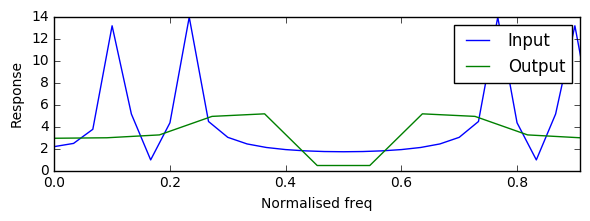

In [99]:
X=np.fft.fft(x)
X_=np.fft.fft(x_)
normf=n/ns

normf_=n_/float(len(X_))

plt.subplot(2,1,1)
plt.plot(normf,abs(X),label="Input")
plt.plot(normf_,abs(X_),label="Output")
plt.xlim(0,max(normf_))
plt.legend(loc=1)
plt.xlabel("Normalised freq")
plt.ylabel("Response")
plt.tight_layout()
plt.show()


## Upsampling

In [100]:
L=2
N=4
fpass=2000
fstop=3000
h=sp.remez(N,np.array([0, fpass, fstop, fs]), [1,0], Hz = L*fs)  

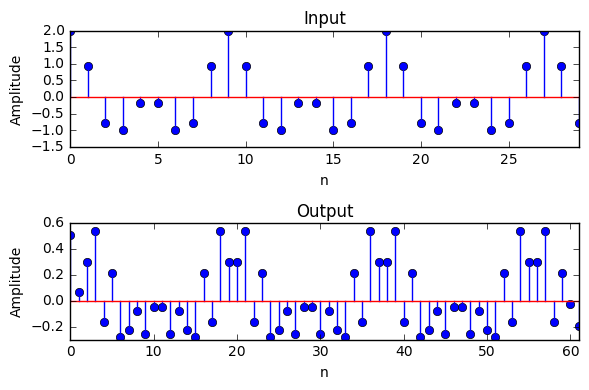

In [101]:
### Upsampling
def inc_pad(x,L):
	size=(L-1)*(len(x)-1)+len(x)
	z=np.zeros(size,)
	for i in range(len(x)):
		z[i*L]=x[i]
	return z
u=inc_pad(x,L)
x_=np.convolve(inc_pad(x, L),h) 
n_=np.linspace(0,len(x_)-1,len(x_))


plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlim(0,max(n))
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Input")
plt.subplot(2,1,2)
plt.stem(n_,x_)
plt.xlim(0,max(n_))
plt.title("Output")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

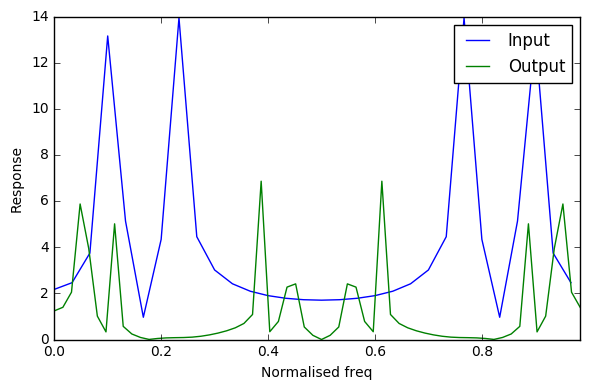

In [102]:
X=np.fft.fft(x)
X_=np.fft.fft(x_)

normf=n/ns

normf_=n_/float(len(X_))


plt.plot(normf,abs(X),label="Input")
plt.plot(normf_,abs(X_),label="Output")
plt.xlim(0,max(normf_))
plt.legend(loc=1)
plt.xlabel("Normalised freq")
plt.ylabel("Response")
plt.tight_layout()
plt.show()

## Sampling by non-integer value 

### Sampling by 2.5 i.e Upsampling by 5 and Downsampling by 2

In [103]:
L=5
M=2
N=4
fpass=2000
fstop=3000
h1=sp.remez(N,np.array([0, fpass, fstop, fs]), [1,0], Hz = L*fs)  
h2=sp.remez(N,np.array([0, fpass, fstop, (L*fs)/(2.*M)]), [1,0], Hz = L*fs)  

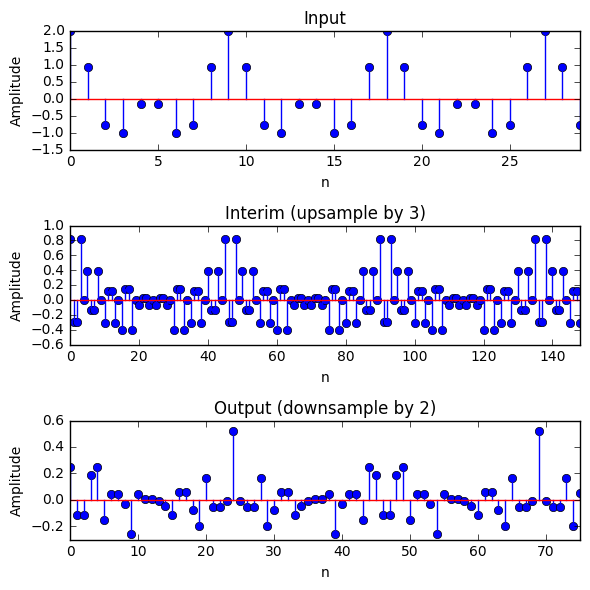

In [106]:
#upsampling by 3
y1=np.convolve(inc_pad(x,L),h1)

#downsampling by 2
y2=drop(np.convolve(y1,h2), M)

n1=np.linspace(0,len(y1)-1,len(y1))
n2=np.linspace(0,len(y2)-1,len(y2))


plt.figure(figsize=(6,6))
plt.subplot(3,1,1)
plt.stem(n,x)
plt.xlim(0,max(n))
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Input")
plt.subplot(3,1,2)
plt.stem(n1,y1)
plt.xlim(0,max(n1))
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Interim (upsample by 3)")
plt.subplot(3,1,3)
plt.stem(n2,y2)
plt.xlim(0,max(n2))
plt.title("Output (downsample by 2)")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

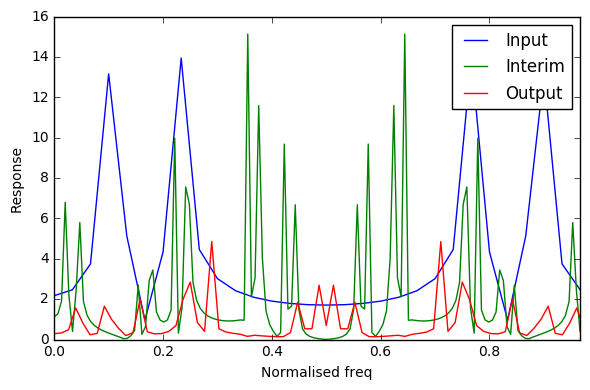

In [107]:
X=np.fft.fft(x)
Y1=np.fft.fft(y1)
Y2=np.fft.fft(y2)

normf=n/ns
normf1=n1/float(len(y1))
normf2=n2/float(len(y2))


plt.plot(normf,abs(X),label="Input")
plt.plot(normf1,abs(Y1),label="Interim")
plt.plot(normf2,abs(Y2),label="Output")
plt.xlim(0,max(normf))
plt.legend(loc=1)
plt.xlabel("Normalised freq")
plt.ylabel("Response")
plt.tight_layout()
plt.show()